# Hybrid Plant with Battery Storage Example
---
In this example, we will explore how to simulate a hybrid renewable energy system that includes both wind and solar power sources, along with battery energy storage. The battery uses the default dispatch model,simple dispatch, which uses a profit maximization objective function.

The key aspects we will cover include setting up the simulation environment, configuring the system, running the simulation, and visualizing the results.

### Import Required Modules
Begin by importing the necessary modules for the simulation.

In [1]:
from hopp.simulation import HoppInterface
from hopp.simulation.technologies.dispatch.plot_tools import (
    plot_battery_output, plot_battery_dispatch_error, plot_generation_profile
)

/Users/cirmas/workspace/HOPP/examples/workshop/log/hybrid_systems_2023-10-23T14.55.01.340420.log


### Create the Simulation Model
Instantiate the `HoppInterface` class by providing a YAML configuration.

In order to configure the battery dispatch model, ensure that you include a `grid_resource_file` within the `site` section, and incorporate the `battery` size and capacity into the `technologies` section of the YAML configuration.

In [2]:
hi = HoppInterface("./inputs/03-wind-solar-battery.yaml")

### Run the Simulation
Simulate the hybrid renewable energy system for a specified number of years (in this case, 20 years).

In [3]:
hi.simulate(project_life=20)

### Print Simulation Results
Access and display various simulation results, including annual energies, net present values (NPVs), and total revenues.

In [4]:
hybrid_plant = hi.system

print("Output after losses over gross output:",
      hybrid_plant.wind.value("annual_energy") / hybrid_plant.wind.value("annual_gross_energy"))

# Save the outputs
annual_energies = hybrid_plant.annual_energies
npvs = hybrid_plant.net_present_values
revs = hybrid_plant.total_revenues

print("Annual Energies:")
print(annual_energies)

print("Net Present Values:")
print(npvs)

print("Total Revenues:")
print(revs)

Output after losses over gross output: 0.7996592849806096
Annual Energies:
{"pv": 104053614.17593749, "wind": 162478037.0463255, "battery": -844177.4907156784, "hybrid": 256923989.00261778}
Net Present Values:
{"pv": -6509143.037339628, "wind": -12154086.966226012, "battery": -32294138.455373134, "hybrid": -54334843.799049035}
Total Revenues:
{"pv": [0.0, 4032912.4476811443, 4073241.5721579557, 4113973.9878795356, 4155113.727758331, 4196664.865035914, 4238631.513686274, 4281017.828823136, 4323828.007111367, 4367066.287182481, 4410736.950054306, 4454844.3195548495, 4499392.762750397, 4544386.690377901, 4589830.55728168, 4635728.862854498, 4682086.151483042, 4728907.012997874, 4776196.083127852, 4823958.0439591305, 4872197.624398721], "wind": [0.0, 6392419.0883130925, 6456343.279196222, 6520906.7119881855, 6586115.779108068, 6651976.936899147, 6718496.70626814, 6785681.673330821, 6853538.490064128, 6922073.874964771, 6991294.613714417, 7061207.559851563, 7131819.635450078, 7203137.831804

### Visualize Simulation Results (Optional)
Optionally, you can visualize the simulation results using plots. Several functions are provided for plotting battery output, generation profiles, and dispatch errors.

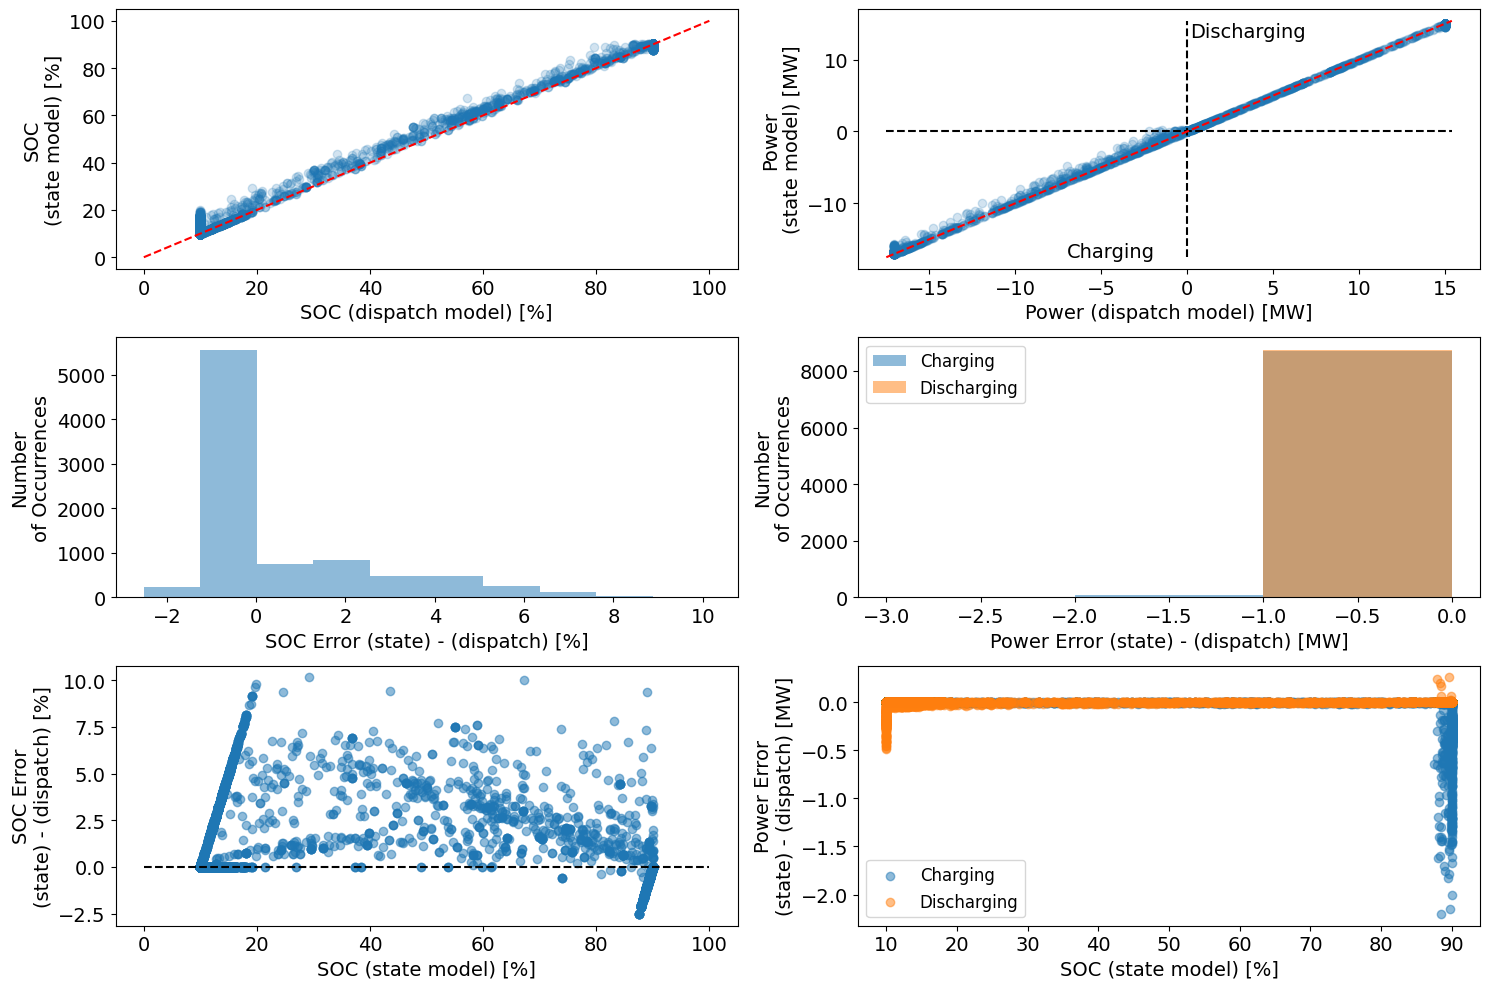

In [5]:
plot_battery_dispatch_error(hybrid_plant)

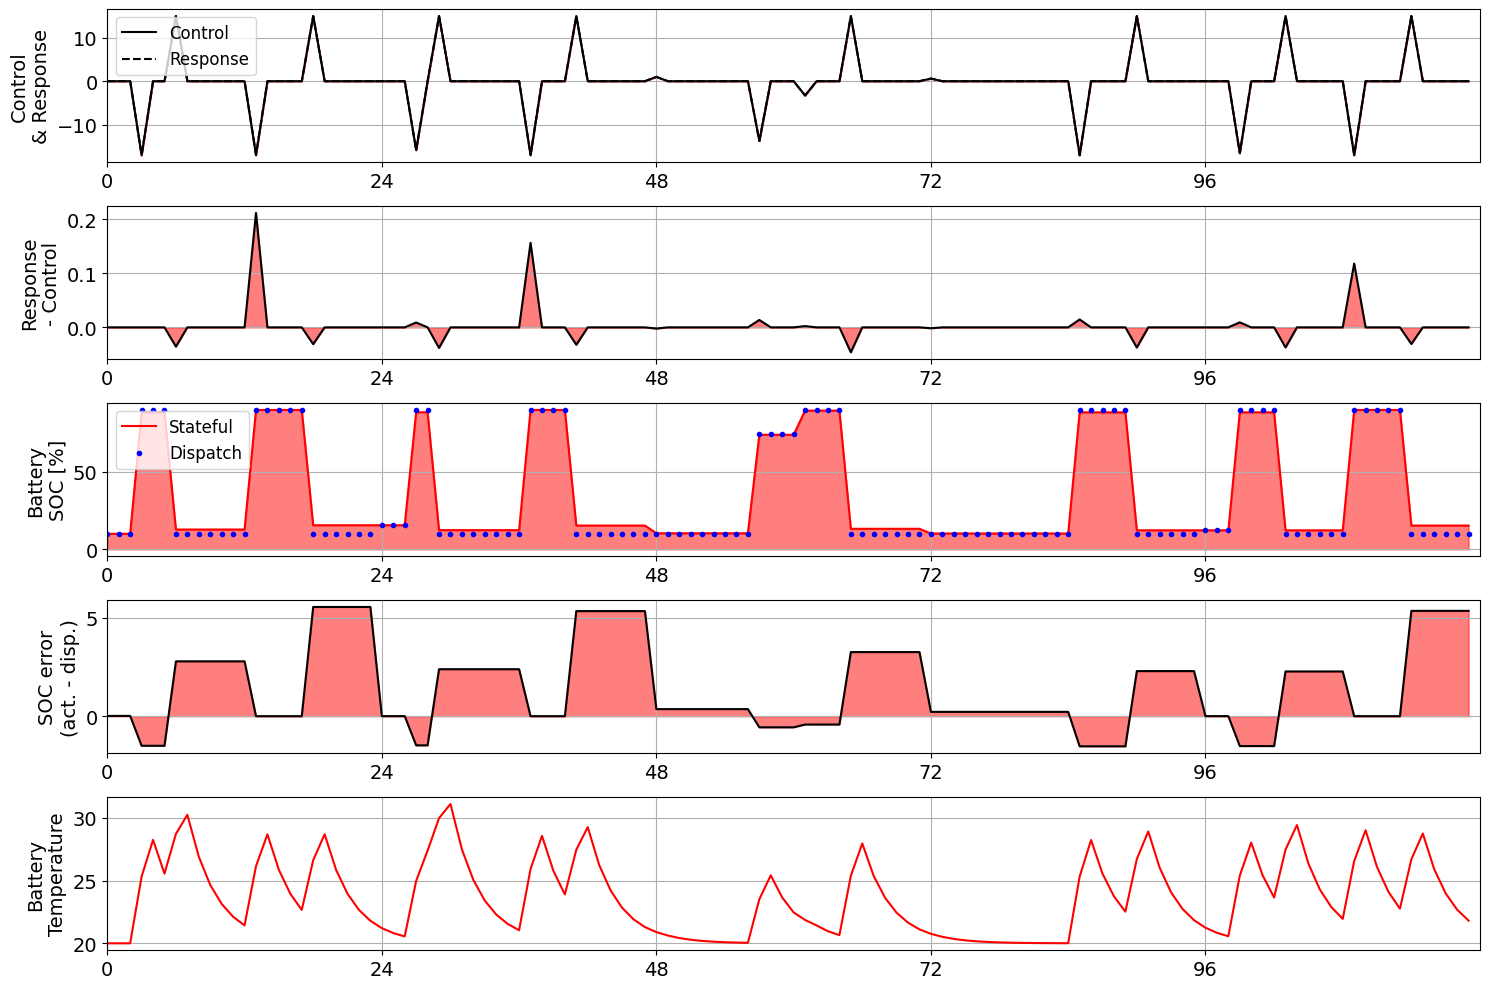

In [6]:
plot_battery_output(hybrid_plant)


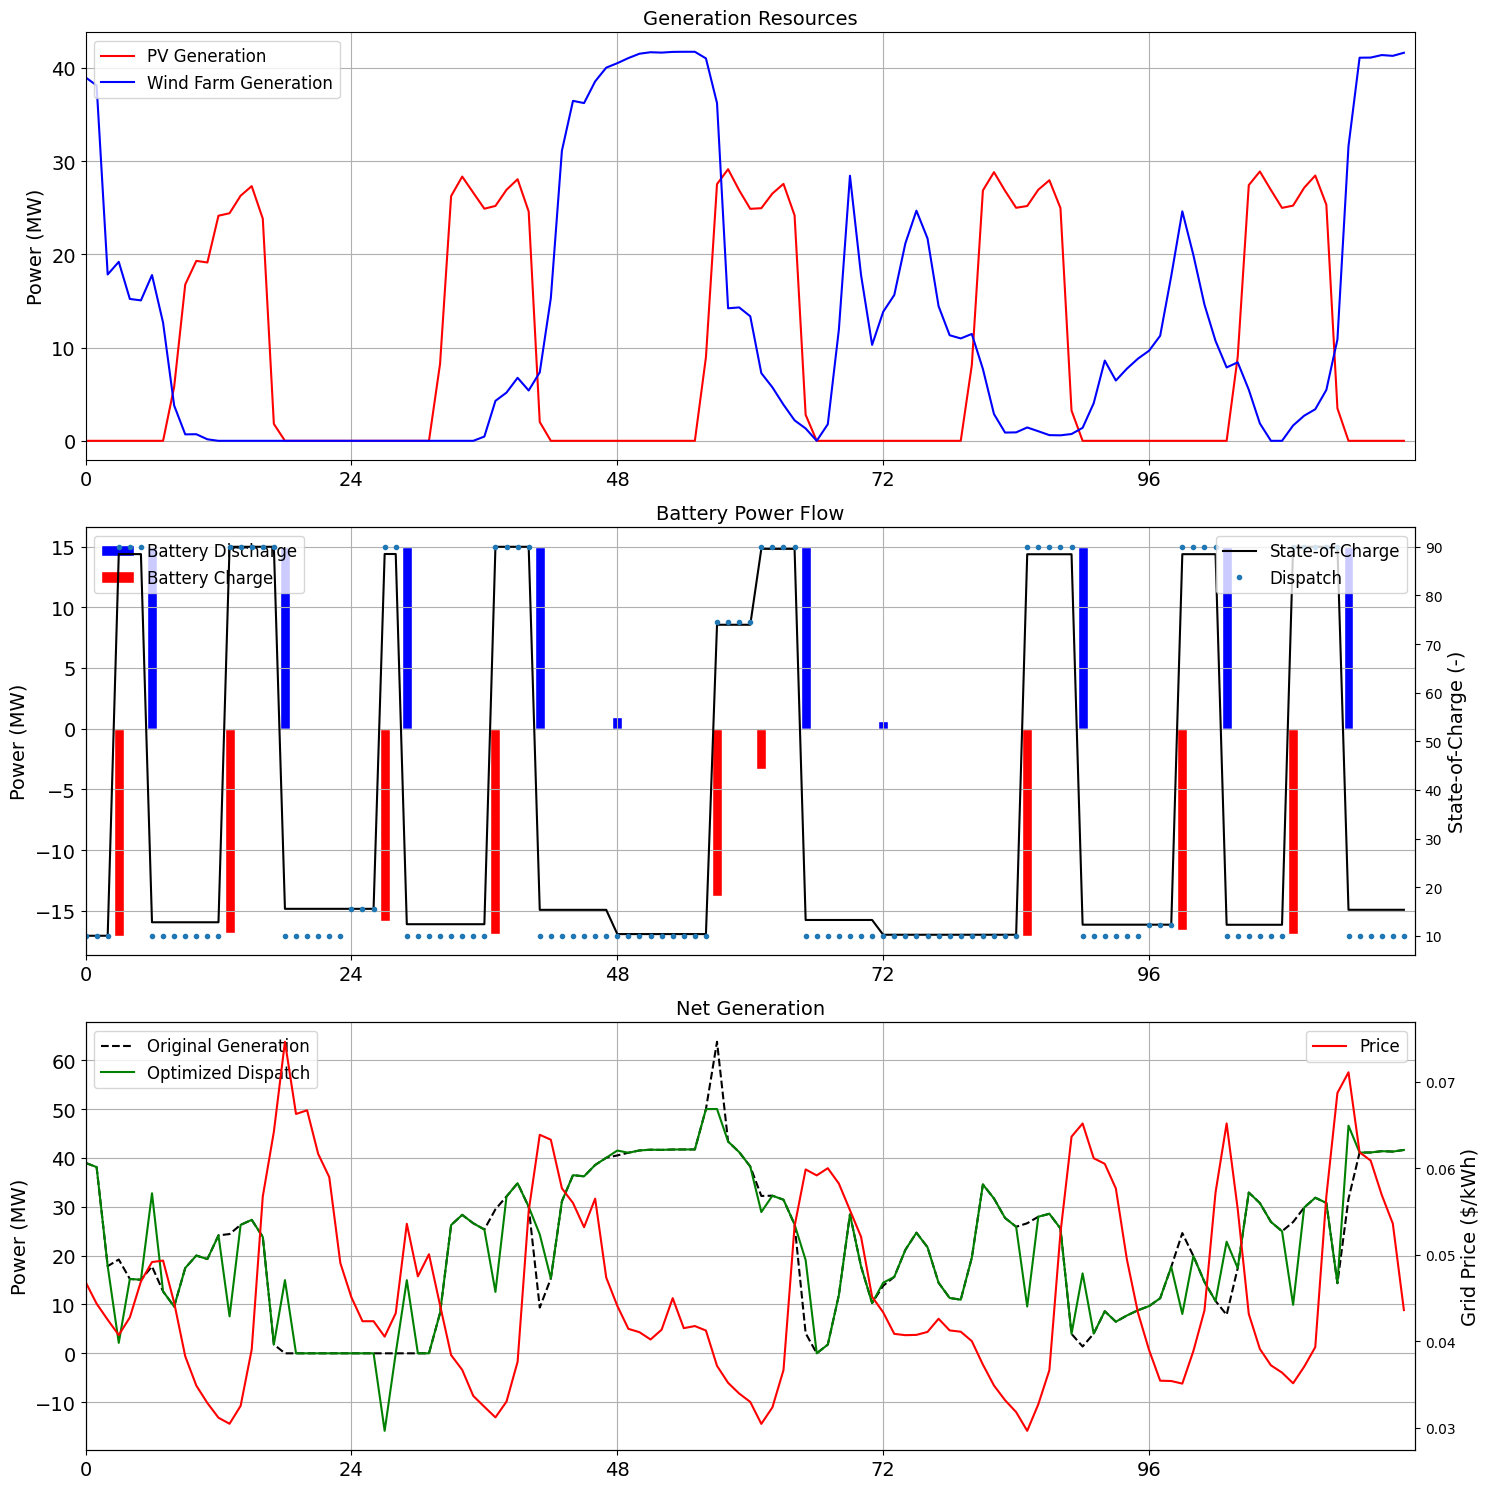

In [7]:
plot_generation_profile(hybrid_plant)